In [215]:
import numpy as np
import csv
import time
import matplotlib.pyplot as plt
from PIL import Image, ImageSequence

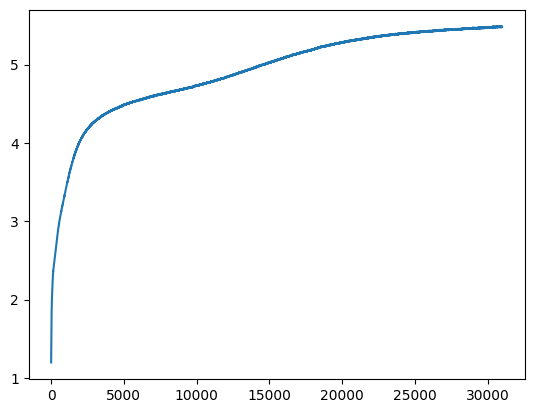

In [206]:
#Importing the data obtained from the MC-PAM
file_name = 'F_220727_145558_0.CSV'
data = np.genfromtxt(file_name, delimiter=';', skip_header=1)[:, :2]

#Considering only positive times
data = data[data[:,0] > 0]

#Exporting the data for C++ analysis
np.savetxt('data_for_analysis.csv', data, fmt=['%.2f','%.4f'])

#First overview of the data
plt.plot(data[:,1])

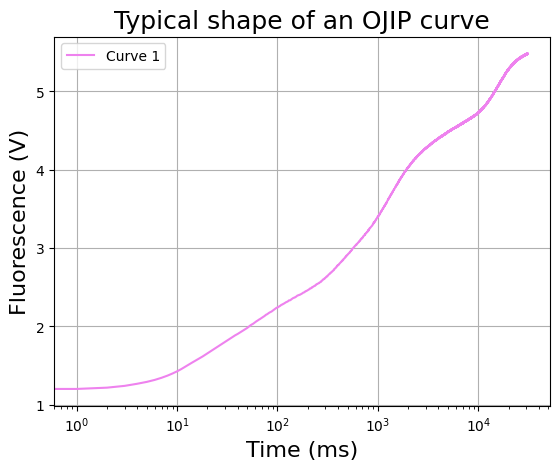

In [37]:
#Plot the data using logscale
plt.plot(data[:,1], label = 'Curve 1', color = 'violet')
plt.title('Typical shape of an OJIP curve', fontsize = 18)
plt.ylabel('Fluorescence (V)', fontsize = 16)
plt.xlabel('Time (ms)', fontsize = 16)
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [38]:
#Importing comparison data for measuring the difference between A1, A2, A3 and F
#between the new and old algorithm
data_2 = np.loadtxt('avals.dat')
d1 = data_2[:24000]
d2 = data_2[24000:]

In [64]:
#Defining a Function for the Comparison Plot
def comparison_graphs(y_1, y_2, title = None, x_pos = None, y_pos = None, y_logscale = True):
    
    """
    Plot to compare two data series.
    
    Args:
        y_1 (array of floats) - first serie corresponding to the 'new' values
        y_2 (array of floats) - second serie corresponding to the 'old' values
        title (string) - title of the plot
        x_pos (float) - x position for the RSME box 
        y_pos (float) - y position for the RSME box
        y_logscale (boolean) - set y scale in log scale
    """
    xx = np.arange(1,len(y_1)+1)/1000
    
    nc = y_1
    oc = y_2

    e = nc - oc

    MSE = np.sqrt(np.dot(e,e)/len(e))
    sigma_formatted = "{:.3e}".format(MSE)

    # Add a text box with the value of sigma
    plt.text(x_pos, y_pos, f'RMSE: {sigma_formatted}', bbox=dict(facecolor='white', alpha=0.5))

    # Add labels and title

    plt.plot(xx, nc, color = 'red', label = 'New Values')
    plt.plot(xx, oc, color = 'b', label = 'Old Values')
    plt.ylabel('Fluorescence [V]', fontsize = 12)
    plt.xlabel('Time [ms]', fontsize = 12)
    plt.legend(fontsize = 12)
    if y_logscale:
        plt.yscale('log')
    plt.xscale('log')
    plt.title(title)
    plt.grid()
    plt.show()

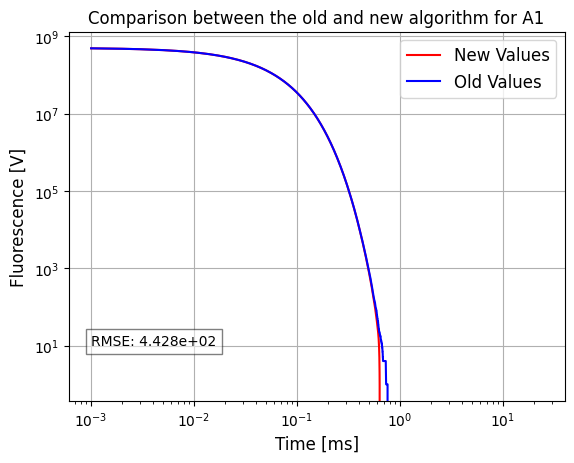

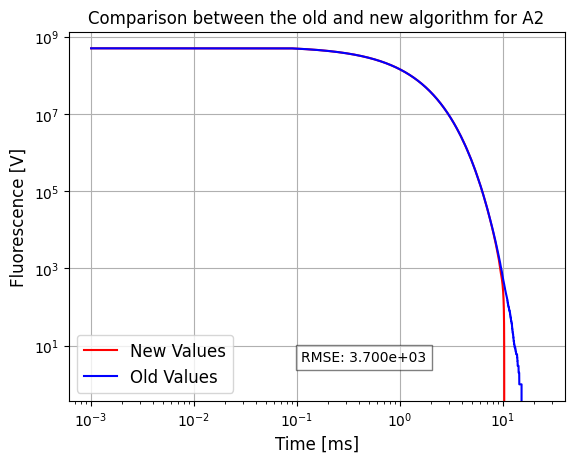

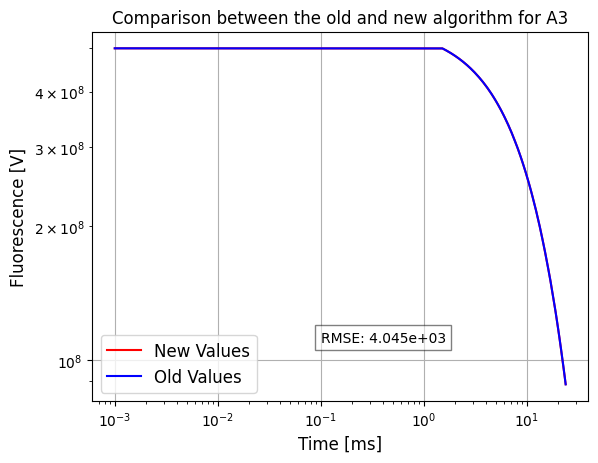

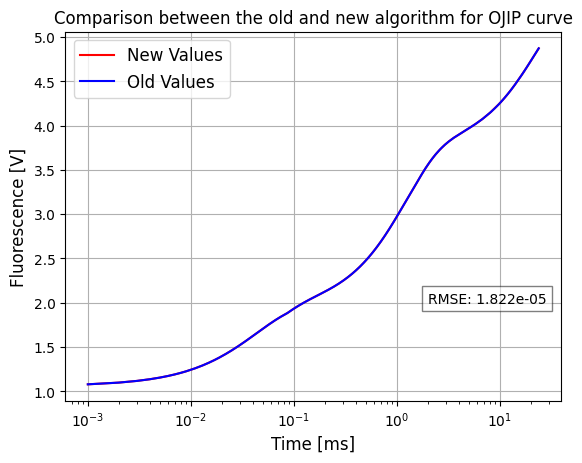

In [65]:
x_pos_1 = [1e-3, 1.1e-1, 1e-1]
y_pos_1 = [1e1, 0.4e1, 1.1e8]

for i in range(1,4):
    titles= 'Comparison between the old and new algorithm for A' + str(i)
    comparison_graphs(d1[:,i], d2[:,i], title = titles, x_pos = x_pos_1[i-1], y_pos = y_pos_1[i-1])
    
titles= 'Comparison between the old and new algorithm for OJIP curve'
comparison_graphs(d1[:,4], d2[:,4], title = titles, x_pos = 2, y_pos = 2, y_logscale = False)    

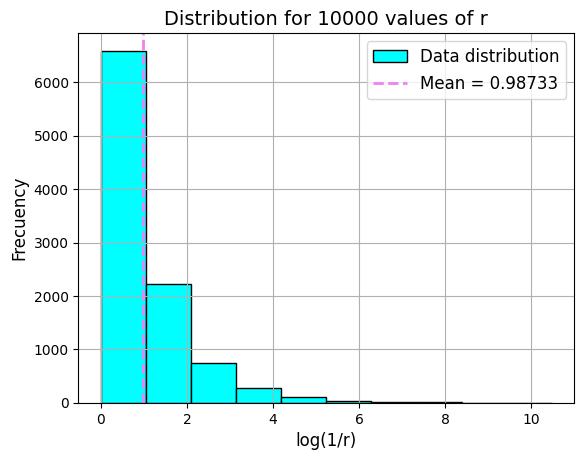

In [161]:
#Distribution of log(1/r) when r is a random number R~U(0,1)
n = 10000
r = np.random.rand(n)
mean_r = np.mean(np.log(1/r))
mean_formatted = "{:.5f}".format(mean_r)
plt.title('Distribution for ' + str(n) + ' values of r', fontsize = 14)
plt.ylabel('Frecuency', fontsize = 12)
plt.xlabel('log(1/r)', fontsize = 12)
plt.hist(np.log(1/r), color = 'cyan', edgecolor='black', label='Data distribution')
plt.axvline(x=mean_r, color='violet', linestyle='dashed', linewidth=2, label='Mean = ' + str(mean_formatted))
plt.grid()
plt.legend(fontsize = 12)
plt.show()

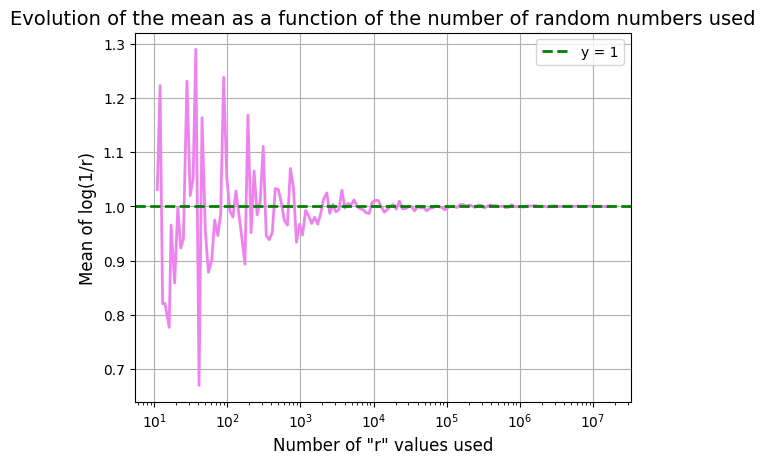

In [162]:
#Evolution of the mean as a function of the number of random numbers used

#Creating the data
number_r = []
mean_r2 = []
prev = 10
for i in range(150):
    prev *= 1.1
    r = np.random.rand(int(prev))
    r2 = np.mean(np.log(1/r))
    mean_r2.append(r2)
    number_r.append(int(prev))
    
#Plotting the data

plt.title('Evolution of the mean as a function of the number of random numbers used', fontsize = 14)
plt.plot(number_r,mean_r2, color = 'violet', linewidth=2)
plt.ylabel('Mean of log(1/r)', fontsize = 12)
plt.xlabel('Number of "r" values used', fontsize = 12)
plt.axhline(y=1, color='green', linestyle='dashed', linewidth=2, label='y = 1')
plt.legend()
plt.grid()
plt.xscale('log')
plt.show()

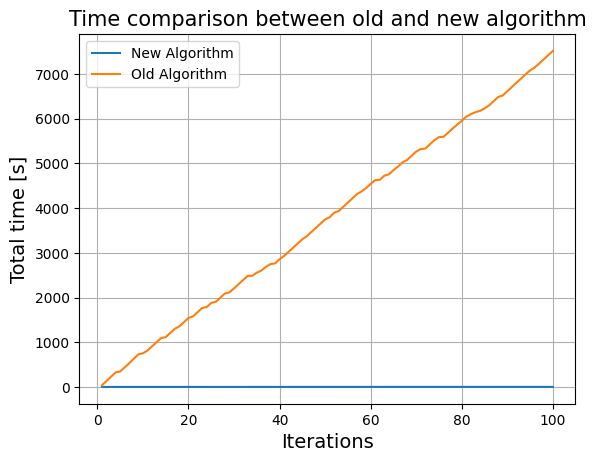

In [187]:
#Importing files for performance comparison between old and new algo
file_old = 'time1.dat'
file_new = 'time2.dat'
time_old = np.genfromtxt(file_old, delimiter=' ')
time_new = np.genfromtxt(file_new, delimiter=' ')

#Plotting
plt.plot(time_new[:,0],time_new[:,1], label = 'New Algorithm')
plt.plot(time_old[:,0],time_old[:,1], label = 'Old Algorithm')
plt.title('Time comparison between old and new algorithm', fontsize = 15)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Total time [s]', fontsize = 14)
plt.legend()
plt.grid()
plt.show()

In [189]:
file_final = 'model.dat'
final_data = np.genfromtxt(file_final, delimiter=' ')

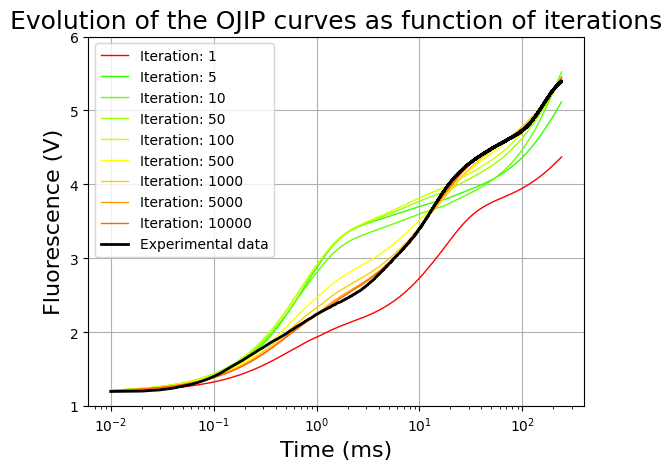

In [239]:
#Final OJIP curves. Evolution as function of iterations
itera = ['1', '5','10', '50', '100', '500', '1000', '5000', '10000', '10000']
colors = ['#ff0000', '#ff3300', '#ff6600', '#ff9900', '#ffcc00', '#ffff00', '#ccff00', '#99ff00', '#66ff00', '#33ff00']
# Create a colormap with linear interpolation
images = []
for i in range(9):
    begin = 24000*i
    d = final_data[begin:begin+24000]
    plt.plot(d[:,0],d[:,2], label = 'Iteration: ' + str(itera[i]), linewidth=1, color = colors[-i])
    rmse = np.sqrt(np.mean((d[:,2]-data[:len(d),1])**2))
    rmse_formatted = "{:.4f}".format(rmse)
    #plt.show()
    #plt.xlim(0.01, 250)
    #filename = f"image_{i}.png"
    #plt.savefig(filename)
    #images.append(Image.open(filename))
plt.plot(d[:,0],data[:len(d),1], label = 'Experimental data', color = 'black', linewidth=2)
plt.title('Evolution of the OJIP curves as function of iterations', fontsize = 18)
plt.ylim(1, 6)
plt.ylabel('Fluorescence (V)', fontsize = 16)
plt.xlabel('Time (ms)', fontsize = 16)
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()

In [235]:
# Save the images as a GIF
gif_filename = "animation.gif"
images[0].save(
    gif_filename,
    save_all=True,
    append_images=images[1:],
    duration=1000,  # Set the duration between frames in milliseconds
    loop=0,  # Set loop to 0 for an infinite loop, or specify the number of loops
)

In [295]:
final_parameters = 'parmle.dat'
parameters = np.genfromtxt(final_parameters, delimiter=' ',skip_header=1, dtype=np.float64)

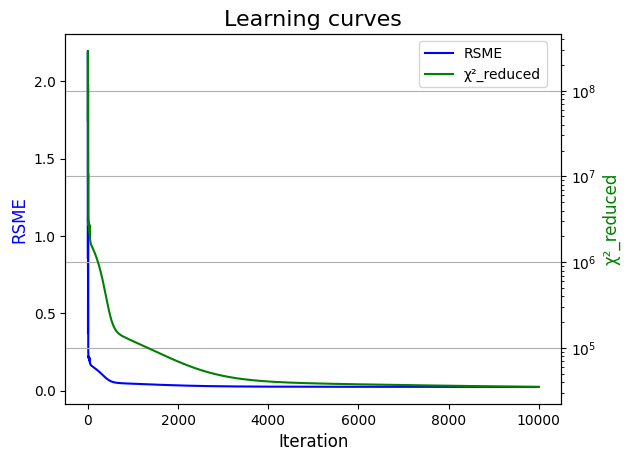

In [278]:
# Create the primary y-axis
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis
line1, = ax1.plot(parameters[:,-1], color='blue', label='RSME')
ax1.set_xlabel('Iteration', fontsize = 12)
ax1.set_ylabel('RSME', color='blue', fontsize = 12)
#ax1.legend()

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second dataset on the secondary y-axis
line2, = ax2.plot(parameters[:,-2], color='green', label='χ²_reduced')
ax2.set_ylabel('χ²_reduced', color='green', fontsize = 12)
ax2.set_yscale('log')

# Combine the legend for both lines
lines = [line1, line2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.7, 1))

# Show the plot

# Show the plot
#plt.legend()
#plt.xscale('log')
plt.grid()
plt.title('Learning curves', fontsize = 16)
plt.show()

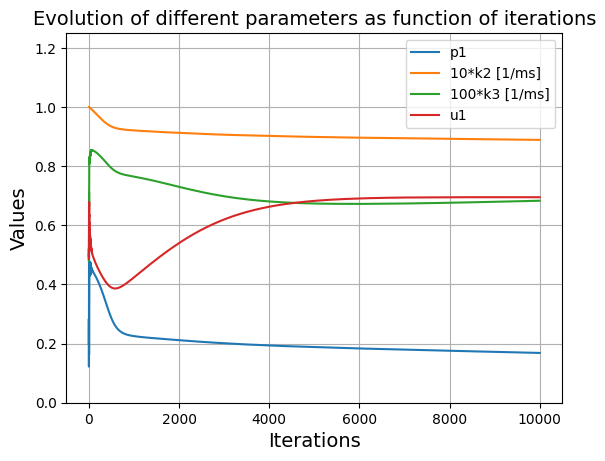

In [317]:
#Plot for evolution of parameters
plt.plot(parameters[:,2], label = 'p1')
plt.plot(10*parameters[:,3], label = '10*k2 [1/ms]')
plt.plot(100*parameters[:,7], label = '100*k3 [1/ms]')
plt.plot(parameters[:,9], label = 'u1')
plt.title('Evolution of different parameters as function of iterations', fontsize =14)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('Values', fontsize = 14)
plt.ylim(0,1.25)
plt.legend()
plt.grid()
plt.show()